In [42]:
import pandas as pd

In [43]:
df = pd.read_table("./sms-call-internet-mi-2013-11-01.txt",
                  header=None)

In [44]:
df.columns = ['Square_id', 'Time_interval', 'Country_code', 'SMS_in', 'SMS_out', 'Call_in',
              'Call_out', 'Internet_traffic']

In [45]:
df.head()

,Square_id,Time_interval,Country_code,SMS_in,SMS_out,Call_in,Call_out,Internet_traffic
0,1,1383260400000,0,0.081363,NaN,NaN,NaN,NaN
1,1,1383260400000,39,0.141864,0.156787,0.160938,0.052275,11.028366
2,1,1383261000000,0,0.136588,NaN,NaN,0.027300,NaN
3,1,1383261000000,33,NaN,NaN,NaN,NaN,0.026137
4,1,1383261000000,39,0.278452,0.119926,0.188777,0.133637,11.100963


In [46]:
df

,Square_id,Time_interval,Country_code,SMS_in,SMS_out,Call_in,Call_out,Internet_traffic
0,1,1383260400000,0,0.081363,NaN,NaN,NaN,NaN
1,1,1383260400000,39,0.141864,0.156787,0.160938,0.052275,11.028366
2,1,1383261000000,0,0.136588,NaN,NaN,0.027300,NaN
3,1,1383261000000,33,NaN,NaN,NaN,NaN,0.026137
4,1,1383261000000,39,0.278452,0.119926,0.188777,0.133637,11.100963
...,...,...,...,...,...,...,...,...
4842620,9999,1383345600000,0,0.159189,NaN,NaN,NaN,NaN
4842621,9999,1383345600000,33,0.014708,NaN,NaN,NaN,NaN
4842622,9999,1383345600000,39,0.646086,0.550928,NaN,0.014708,16.453566
4842623,9999,1383346200000,39,0.894907,0.518741,0.085995,0.085995,21.283461


In [47]:
# rows with non-zero sms_in
filtered_df = df.drop(index = df[(df.SMS_in == 0)].index.tolist())

In [48]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4842625 entries, 0 to 4842624
Data columns (total 8 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Square_id         int64  
 1   Time_interval     int64  
 2   Country_code      int64  
 3   SMS_in            float64
 4   SMS_out           float64
 5   Call_in           float64
 6   Call_out          float64
 7   Internet_traffic  float64
dtypes: float64(5), int64(3)
memory usage: 295.6 MB


In [49]:
filtered_df=filtered_df.reset_index(drop=True)

In [50]:
filtered_df.count()

Square_id           4842625
Time_interval       4842625
Country_code        4842625
SMS_in              2861448
SMS_out             1632555
Call_in             1513202
Call_out            2231609
Internet_traffic    2353999
dtype: int64

In [51]:
non_nan_df = filtered_df.dropna()

In [52]:
non_nan_df.count()

Square_id           1095911
Time_interval       1095911
Country_code        1095911
SMS_in              1095911
SMS_out             1095911
Call_in             1095911
Call_out            1095911
Internet_traffic    1095911
dtype: int64

In [53]:
non_nan_df=non_nan_df.reset_index(drop=True)

In [54]:
non_nan_df.head()

,Square_id,Time_interval,Country_code,SMS_in,SMS_out,Call_in,Call_out,Internet_traffic
0,1,1383260400000,39,0.141864,0.156787,0.160938,0.052275,11.028366
1,1,1383261000000,39,0.278452,0.119926,0.188777,0.133637,11.100963
2,1,1383261600000,39,0.330641,0.170952,0.134176,0.054601,10.892771
3,1,1383262200000,39,0.681434,0.220815,0.027300,0.053438,8.622425
4,1,1383262800000,39,0.243378,0.192891,0.053438,0.080738,8.009927


In [55]:
grid_1 = non_nan_df[non_nan_df.Square_id==1]

In [83]:
grid_1_c = non_nan_df[non_nan_df.Square_id==1]

In [104]:
grid_1_c[grid_1_c['Internet_traffic']==9.431191468740728]

,Square_id,Time_interval,Country_code,SMS_in,SMS_out,Call_in,Call_out,Internet_traffic
18,1,1383289200000,39,0.470265,0.225724,0.106337,0.079575,9.431191


In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [94]:
lags = [6]

In [95]:
for lag in lags:
    grid_1[f'avg_internet{lag}'] = grid_1['Internet_traffic'].shift(lag)

In [96]:
grid_1 = grid_1.dropna()
grid_1 = grid_1.reset_index(drop=True)

In [103]:
grid_1

,Square_id,Time_interval,Country_code,SMS_in,SMS_out,Call_in,Call_out,Internet_traffic,avg_internet6
0,1,1383289200000,39,0.470265,0.225724,0.106337,0.079575,9.431191,6.640461
1,1,1383289800000,39,0.137751,0.078460,0.108663,0.292164,9.082516,7.009200
2,1,1383290400000,39,0.509576,0.185912,0.189401,0.052275,8.340410,6.160144
3,1,1383291000000,39,0.139538,0.188863,0.303965,0.251776,10.518264,7.797889
4,1,1383291600000,39,0.405565,0.512440,0.191813,0.333763,10.463748,7.309885
...,...,...,...,...,...,...,...,...,...
91,1,1383343800000,39,0.371825,0.317224,0.108039,0.079575,10.659124,10.656713
92,1,1383344400000,39,0.053438,0.213752,0.054062,0.078412,9.063345,10.588497
93,1,1383345000000,39,0.346226,0.293951,0.003575,0.052275,9.272482,9.717907
94,1,1383345600000,39,0.111613,0.057013,0.026137,0.106876,7.957519,9.142527


In [65]:
split = int(108*0.9)
train = grid_1.loc[grid_1.index < split]
test = grid_1.loc[grid_1.index >= split]

In [72]:
features = [f'avg_internet{i}' for i in lags]
target = 'Internet_traffic'

In [73]:
train[features]

,avg_internet6
0,8.026270
1,8.514179
2,6.833425
3,6.554605
4,6.085674
...,...
92,9.142832
93,9.966647
94,8.967376
95,10.367670


In [74]:
lr = LinearRegression()
lr.fit(train[features], train[target])

LinearRegression()

In [75]:
lr.score(train[features], train[target])

0.33345280808885436

In [76]:
test['predicted_traffic'] = lr.predict(test[features])

/var/folders/yt/vt2nsgcj3mn_2hpygxfqs0_w0000gn/T/ipykernel_5415/1313133817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted_traffic'] = lr.predict(test[features])


In [77]:
test

,Square_id,Time_interval,Country_code,SMS_in,SMS_out,Call_in,Call_out,Internet_traffic,avg_internet6,predicted_traffic
97,1,1383343800000,39,0.371825,0.317224,0.108039,0.079575,10.659124,10.656713,11.444571
98,1,1383344400000,39,0.053438,0.213752,0.054062,0.078412,9.063345,10.588497,11.408664
99,1,1383345000000,39,0.346226,0.293951,0.003575,0.052275,9.272482,9.717907,10.950411
100,1,1383345600000,39,0.111613,0.057013,0.026137,0.106876,7.957519,9.142527,10.647548
101,1,1383346200000,39,0.398501,0.349715,0.053438,0.026137,13.228099,7.898362,9.992656


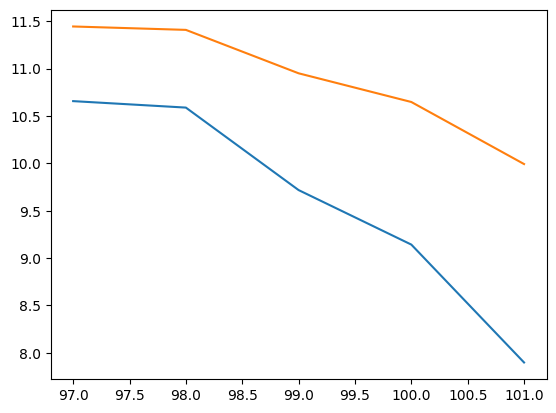

In [81]:
plt.plot(test.index, test['avg_internet6'])
plt.plot(test.index, test['predicted_traffic'])


In [118]:
# meaningless small test
test_lags = [1, 3, 6]
shift_test = pd.DataFrame()
for lag in test_lags:
    shift_test[f'traffic_{lag}'] = grid_1_c['Internet_traffic'].shift(lag)

In [119]:
shift_test

,traffic_1,traffic_3,traffic_6
0,NaN,NaN,NaN
1,11.028366,NaN,NaN
2,11.100963,NaN,NaN
3,10.892771,11.028366,NaN
4,8.622425,11.100963,NaN
...,...,...,...
109,8.635192,9.142527,10.656713
110,10.659124,7.898362,10.588497
111,9.063345,8.635192,9.717907
112,9.272482,10.659124,9.142527


In [120]:
grid_1_c

,Square_id,Time_interval,Country_code,SMS_in,SMS_out,Call_in,Call_out,Internet_traffic
0,1,1383260400000,39,0.141864,0.156787,0.160938,0.052275,11.028366
1,1,1383261000000,39,0.278452,0.119926,0.188777,0.133637,11.100963
2,1,1383261600000,39,0.330641,0.170952,0.134176,0.054601,10.892771
3,1,1383262200000,39,0.681434,0.220815,0.027300,0.053438,8.622425
4,1,1383262800000,39,0.243378,0.192891,0.053438,0.080738,8.009927
...,...,...,...,...,...,...,...,...
109,1,1383343800000,39,0.371825,0.317224,0.108039,0.079575,10.659124
110,1,1383344400000,39,0.053438,0.213752,0.054062,0.078412,9.063345
111,1,1383345000000,39,0.346226,0.293951,0.003575,0.052275,9.272482
112,1,1383345600000,39,0.111613,0.057013,0.026137,0.106876,7.957519
